# project Predicting Car Prices 
by Musab Alabdullatif


# contents 
## part 1 data analysis 
### 1.0 goals 
### 1.1 about data
### 1.2 QUESTIONS
### 1.3 Preprocess the Data
### 1.4 Exploratory Data Analysis (EDA)
## part 2 build model 
-------------------------------------------------------------------------------------------------------------------------

# 1.0 Goals 
The objective of the project is to identify a proper machine-learning model that predicts the price of a used car based on features like mileage, age, fuel type, and engine size, among others and get good insight from dataset. This model will let us know how these factors affect car prices and give us an efficient way to estimate the value of a used car.

In [68]:
# improt the important library we will use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


-------------------------------------------------------------------------------------------------------------------------

# 1.1 about data 
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data
> We are going to use the `used_cars` dataset. Since car price is a continuous variable, this is a regression problem. The data contains the following columns:


> * '`brand`': The manufacturer or brand name of the vehicle.
> * '`model`': The specific model or trim name of the car.
> * '`model_year`': The year the car model was manufactured or released.
> * '`mileage`': The number of miles the car has been driven.
> * '`fuel_type`': The type of fuel the car uses.
> * '`engine`': Details of the engine's specifications.
> * '`transmission`': The type of transmission the car uses.
> * '`ext_col`': The color of the car's exterior.
> * '`int_col`': The color of the car's interior.
> * '`accident`': Information about whether the car has been involved in an accident or has damage.
> * '`clean_title`': Indicates whether the car has a "clean title" (no major accidents, theft, or significant damage in the history). 
> * '`Price`': The price of the car.



In [69]:
# read dataset 
df=pd.read_csv("used_cars.csv")

df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


---------------------------------------------------------------------------------------------------------------------------

# 1.2  QUESTIONS
### 1- is milage, model_year, fuel_type and accident effecting on price ?
### 2- What is the average price of cars in the dataset?
### 3- Which brand has the most cars listed in the dataset?
### 4- What is the most common fuel type in the dataset?
### 5- Which car has the lowest price?
### 6- Which model has the highest price?
### 7- What is the most common interior color in the dataset?

# 1.3 Preprocess the Data

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [71]:
print(df.columns)


Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [72]:
# number of Null value in each column
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [74]:
#clean number of Null vlaue in each column
df.dropna(inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3269 non-null   object
 1   model         3269 non-null   object
 2   model_year    3269 non-null   int64 
 3   milage        3269 non-null   object
 4   fuel_type     3269 non-null   object
 5   engine        3269 non-null   object
 6   transmission  3269 non-null   object
 7   ext_col       3269 non-null   object
 8   int_col       3269 non-null   object
 9   accident      3269 non-null   object
 10  clean_title   3269 non-null   object
 11  price         3269 non-null   object
dtypes: int64(1), object(11)
memory usage: 332.0+ KB


In [76]:
# check the number of Null value in each column
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [77]:
#check the duplicuted in dataset 
df.duplicated().sum()

0

In [78]:
df.describe()

,model_year
count,3269.000000
mean,2014.601407
std,6.152181
min,1974.000000
25%,2011.000000
50%,2016.000000
75%,2019.000000
max,2024.000000


# 1.4 📊 Exploratory Data Analysis (EDA)


# 1- is milage, model_year, fuel_type and accident effecting on price ?

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3269 non-null   object
 1   model         3269 non-null   object
 2   model_year    3269 non-null   int64 
 3   milage        3269 non-null   object
 4   fuel_type     3269 non-null   object
 5   engine        3269 non-null   object
 6   transmission  3269 non-null   object
 7   ext_col       3269 non-null   object
 8   int_col       3269 non-null   object
 9   accident      3269 non-null   object
 10  clean_title   3269 non-null   object
 11  price         3269 non-null   object
dtypes: int64(1), object(11)
memory usage: 332.0+ KB


In [80]:
df_q1=df[["milage","model_year","fuel_type","accident","price"]]

In [81]:
df_q1

,milage,model_year,fuel_type,accident,price
0,"51,000 mi.",2013,E85 Flex Fuel,At least 1 accident or damage reported,"$10,300"
1,"34,742 mi.",2021,Gasoline,At least 1 accident or damage reported,"$38,005"
3,"88,900 mi.",2015,Hybrid,None reported,"$15,500"
6,"84,000 mi.",2017,Gasoline,None reported,"$31,000"
7,"242,000 mi.",2001,Gasoline,None reported,"$7,300"
...,...,...,...,...,...
4003,"53,705 mi.",2018,Gasoline,At least 1 accident or damage reported,"$25,900"
4004,714 mi.,2023,Gasoline,None reported,"$349,950"
4005,"10,900 mi.",2022,Gasoline,None reported,"$53,900"
4007,"33,000 mi.",2020,Gasoline,None reported,"$62,999"


In [82]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   milage      3269 non-null   object
 1   model_year  3269 non-null   int64 
 2   fuel_type   3269 non-null   object
 3   accident    3269 non-null   object
 4   price       3269 non-null   object
dtypes: int64(1), object(4)
memory usage: 153.2+ KB


In [85]:
# chage the data type
df_q1["milage"] = df_q1["milage"].str.replace(".","")
df_q1["milage"] = df_q1["milage"].astype(int)
df_q1["model_year"] = df_q1["model_year"].astype(int)
df_q1["price"] = df_q1["price"].str.replace("$","")
df_q1["price"] = df_q1["price"].astype(float)

C:\Users\hmmmr\AppData\Local\Temp\ipykernel_5004\2326431716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1["milage"] = df_q1["milage"].str.replace(".","")
C:\Users\hmmmr\AppData\Local\Temp\ipykernel_5004\2326431716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1["milage"] = df_q1["milage"].astype(int)
C:\Users\hmmmr\AppData\Local\Temp\ipykernel_5004\2326431716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

ValueError: invalid literal for int() with base 10: '10,300'

In [88]:
df_q1["price"] = df_q1["price"].str.replace(",","")
df_q1["price"] = df_q1["price"].astype(int)

C:\Users\hmmmr\AppData\Local\Temp\ipykernel_5004\1801107166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1["price"] = df_q1["price"].str.replace(",","")
C:\Users\hmmmr\AppData\Local\Temp\ipykernel_5004\1801107166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1["price"] = df_q1["price"].astype(int)


In [89]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 0 to 4008
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   milage      3269 non-null   int32 
 1   model_year  3269 non-null   int32 
 2   fuel_type   3269 non-null   object
 3   accident    3269 non-null   object
 4   price       3269 non-null   int32 
dtypes: int32(3), object(2)
memory usage: 114.9+ KB


In [90]:
df_q1.head()

,milage,model_year,fuel_type,accident,price
0,51000,2013,E85 Flex Fuel,At least 1 accident or damage reported,10300
1,34742,2021,Gasoline,At least 1 accident or damage reported,38005
3,88900,2015,Hybrid,None reported,15500
6,84000,2017,Gasoline,None reported,31000
7,242000,2001,Gasoline,None reported,7300


<Axes: >

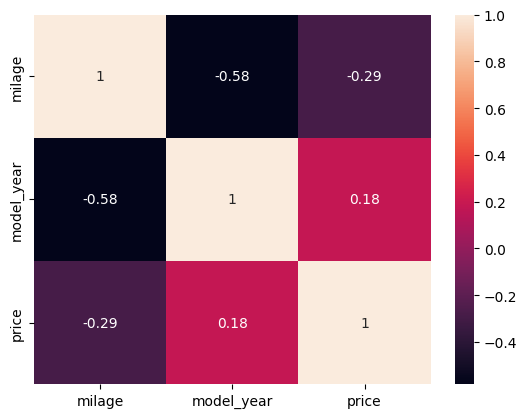

In [94]:
df_corr=df_q1.drop("fuel_type",axis=1)
df_corr=df_corr.drop("accident",axis=1)
sns.heatmap(df_corr.corr(), annot=True)


In [96]:
plt.histgram(x="fuel_type",y="price",data=df_q1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'histgram'